<a href="https://colab.research.google.com/github/tobinw23/Baseball-Projects/blob/main/Bat_Tracking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
pip install pybaseball

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [203]:
bat_tracking = pd.read_csv('/content/bat-tracking.csv')
bat_tracking
from pybaseball import batting_stats_range
data = batting_stats_range('2024-03-28','2024-05-25')
data

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlbID
1,CJ Abrams,23,1,Maj-NL,Washington,47,208,191,30,49,...,1,1,1,8,4,0.257,0.309,0.456,0.765,682928
2,Jos\xc3\xa9 Abreu,37,28,Maj-AL,Houston,22,77,71,6,7,...,0,1,2,0,0,0.099,0.156,0.113,0.269,547989
3,Wilyer Abreu,25,1,Maj-AL,Boston,46,163,144,23,39,...,0,1,1,7,0,0.271,0.350,0.479,0.829,677800
4,Ronald Acu\xc3\xb1a Jr.,26,1,Maj-NL,Atlanta,48,221,191,38,47,...,0,0,4,16,2,0.246,0.348,0.356,0.704,660670
5,Willy Adames,28,1,Maj-NL,Milwaukee,51,225,201,26,49,...,0,1,5,8,2,0.244,0.320,0.428,0.748,642715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,Mike Yastrzemski,33,1,Maj-NL,San Francisco,45,146,134,16,30,...,1,0,0,0,0,0.224,0.283,0.388,0.671,573262
531,Christian Yelich,32,1,Maj-NL,Milwaukee,25,108,93,16,30,...,0,0,0,7,1,0.323,0.411,0.570,0.981,592885
532,Masataka Yoshida,30,28,Maj-AL,Boston,24,89,80,12,22,...,0,0,1,0,0,0.275,0.348,0.388,0.736,807799
533,Jacob Young,24,1,Maj-NL,Washington,41,141,126,23,33,...,3,1,0,15,2,0.262,0.319,0.318,0.636,696285


In [204]:
data['Team'] = data['Lev'] + data['Tm']
data

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlbID,Team
1,CJ Abrams,23,1,Maj-NL,Washington,47,208,191,30,49,...,1,1,8,4,0.257,0.309,0.456,0.765,682928,Maj-NLWashington
2,Jos\xc3\xa9 Abreu,37,28,Maj-AL,Houston,22,77,71,6,7,...,1,2,0,0,0.099,0.156,0.113,0.269,547989,Maj-ALHouston
3,Wilyer Abreu,25,1,Maj-AL,Boston,46,163,144,23,39,...,1,1,7,0,0.271,0.350,0.479,0.829,677800,Maj-ALBoston
4,Ronald Acu\xc3\xb1a Jr.,26,1,Maj-NL,Atlanta,48,221,191,38,47,...,0,4,16,2,0.246,0.348,0.356,0.704,660670,Maj-NLAtlanta
5,Willy Adames,28,1,Maj-NL,Milwaukee,51,225,201,26,49,...,1,5,8,2,0.244,0.320,0.428,0.748,642715,Maj-NLMilwaukee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,Mike Yastrzemski,33,1,Maj-NL,San Francisco,45,146,134,16,30,...,0,0,0,0,0.224,0.283,0.388,0.671,573262,Maj-NLSan Francisco
531,Christian Yelich,32,1,Maj-NL,Milwaukee,25,108,93,16,30,...,0,0,7,1,0.323,0.411,0.570,0.981,592885,Maj-NLMilwaukee
532,Masataka Yoshida,30,28,Maj-AL,Boston,24,89,80,12,22,...,0,1,0,0,0.275,0.348,0.388,0.736,807799,Maj-ALBoston
533,Jacob Young,24,1,Maj-NL,Washington,41,141,126,23,33,...,1,0,15,2,0.262,0.319,0.318,0.636,696285,Maj-NLWashington


In [205]:
bat_tracking['id']

0      519317
1      665833
2      656941
3      666624
4      660670
        ...  
205    668942
206    668930
207    694384
208    457759
209    650333
Name: id, Length: 210, dtype: int64

In [206]:
bat_tracking.rename(columns={"id":"mlbID"},inplace=True)
bat_tracking


,mlbID,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,blast_per_swing,swing_length,swords,batter_run_value,whiffs,whiff_per_swing,batted_ball_events,batted_ball_event_per_swing
0,519317,"Stanton, Giancarlo",258,0.924731,188,80.614616,0.976744,0.308511,0.224806,0.276596,0.201550,8.354011,1,4.559947,70,0.271318,100,0.387597
1,665833,"Cruz, Oneil",228,0.904762,161,77.760378,0.750000,0.335404,0.236842,0.242236,0.171053,7.724568,3,-7.753174,67,0.293860,80,0.350877
2,656941,"Schwarber, Kyle",301,0.898507,210,76.992624,0.744186,0.309524,0.215947,0.204762,0.142857,7.898722,13,-9.622605,91,0.302326,101,0.335548
3,666624,"Morel, Christopher",290,0.909091,206,76.660061,0.713793,0.305825,0.217241,0.189320,0.134483,8.001907,6,-7.052517,84,0.289655,107,0.368966
4,660670,"Acuña Jr., Ronald",316,0.900285,236,76.653085,0.724684,0.292373,0.218354,0.165254,0.123418,7.612023,10,-8.333156,80,0.253165,103,0.325949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,668942,"Rojas, Josh",211,0.901709,172,66.807930,0.014218,0.383721,0.312796,0.116279,0.094787,7.325482,3,-8.708034,39,0.184834,78,0.369668
206,668930,"Turang, Brice",220,0.901639,194,66.746243,0.040909,0.402062,0.354545,0.072165,0.063636,6.041805,4,-2.300642,26,0.118182,100,0.454545
207,694384,"Schanuel, Nolan",211,0.897872,182,65.584345,0.023697,0.434066,0.374408,0.065934,0.056872,6.720545,2,-3.098421,29,0.137441,108,0.511848
208,457759,"Turner, Justin",258,0.898955,221,65.429408,0.011628,0.321267,0.275194,0.049774,0.042636,6.376910,4,-12.939223,37,0.143411,94,0.364341


In [207]:
data['mlbID']

1      682928
2      547989
3      677800
4      660670
5      642715
        ...  
530    573262
531    592885
532    807799
533    696285
534    664874
Name: mlbID, Length: 514, dtype: int64

In [208]:
combined_data = pd.merge(bat_tracking, data, on=['mlbID'], how='inner')
combined_data['Team']

0             Maj-ALNew York
1           Maj-NLPittsburgh
2         Maj-NLPhiladelphia
3              Maj-NLChicago
4              Maj-NLAtlanta
               ...          
205            Maj-ALSeattle
206          Maj-NLMilwaukee
207        Maj-ALLos Angeles
208            Maj-ALToronto
209    Maj-NLMiami,San Diego
Name: Team, Length: 210, dtype: object

In [228]:
combined_data['Team'] = combined_data['Team'].replace('Maj-NLMiami,San Diego','Maj-NLSan Diego')
combined_data

,mlbID,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,Team
0,519317,"Stanton, Giancarlo",258,0.924731,188,80.614616,0.976744,0.308511,0.224806,0.276596,...,0,0,6,0,0,0.240,0.289,0.509,0.797,Maj-ALNew York
1,665833,"Cruz, Oneil",228,0.904762,161,77.760378,0.750000,0.335404,0.236842,0.242236,...,0,0,3,4,1,0.247,0.302,0.421,0.724,Maj-NLPittsburgh
2,656941,"Schwarber, Kyle",301,0.898507,210,76.992624,0.744186,0.309524,0.215947,0.204762,...,0,5,1,2,1,0.234,0.356,0.396,0.752,Maj-NLPhiladelphia
3,666624,"Morel, Christopher",290,0.909091,206,76.660061,0.713793,0.305825,0.217241,0.189320,...,0,4,5,4,2,0.206,0.303,0.389,0.692,Maj-NLChicago
4,660670,"Acuña Jr., Ronald",316,0.900285,236,76.653085,0.724684,0.292373,0.218354,0.165254,...,0,0,4,16,2,0.246,0.348,0.356,0.704,Maj-NLAtlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,668942,"Rojas, Josh",211,0.901709,172,66.807930,0.014218,0.383721,0.312796,0.116279,...,0,0,2,4,2,0.279,0.347,0.412,0.759,Maj-ALSeattle
206,668930,"Turang, Brice",220,0.901639,194,66.746243,0.040909,0.402062,0.354545,0.072165,...,1,2,4,19,0,0.301,0.356,0.429,0.785,Maj-NLMilwaukee
207,694384,"Schanuel, Nolan",211,0.897872,182,65.584345,0.023697,0.434066,0.374408,0.065934,...,2,2,3,0,0,0.238,0.309,0.345,0.654,Maj-ALLos Angeles
208,457759,"Turner, Justin",258,0.898955,221,65.429408,0.011628,0.321267,0.275194,0.049774,...,0,2,7,0,2,0.225,0.300,0.364,0.664,Maj-ALToronto


In [210]:
bat_tracking = pd.read_csv('/content/bat-tracking.csv')

correlation = bat_tracking['avg_bat_speed'].corr(bat_tracking['blast_per_bat_contact'])

print(f"The correlation between avg_bat_speed and blast_per_contact is {correlation}")


The correlation between avg_bat_speed and blast_per_contact is 0.698725125192057


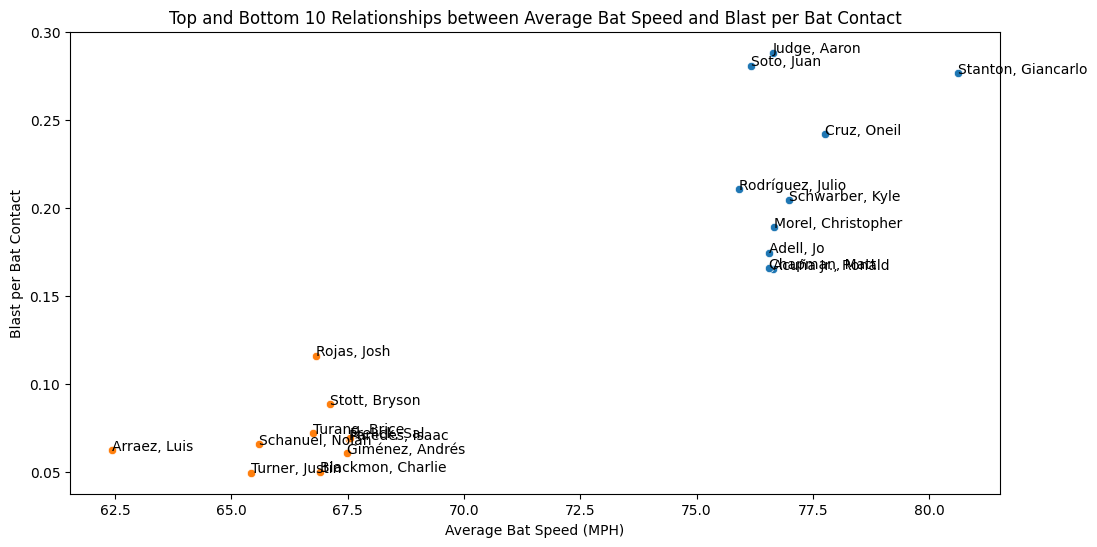

In [211]:
import seaborn as sns

top_10 = bat_tracking.sort_values(by='avg_bat_speed', ascending=False).head(10)
bottom_10 = bat_tracking.sort_values(by='avg_bat_speed', ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_bat_speed', y='blast_per_bat_contact', data=top_10)
sns.scatterplot(x='avg_bat_speed', y='blast_per_bat_contact', data=bottom_10)

for i, row in top_10.iterrows():
    plt.annotate(row['name'], (row['avg_bat_speed'], row['blast_per_bat_contact']))

for i, row in bottom_10.iterrows():
    plt.annotate(row['name'], (row['avg_bat_speed'], row['blast_per_bat_contact']))

plt.xlabel('Average Bat Speed (MPH)')
plt.ylabel('Blast per Bat Contact')
plt.title('Top and Bottom 10 Relationships between Average Bat Speed and Blast per Bat Contact')
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y)

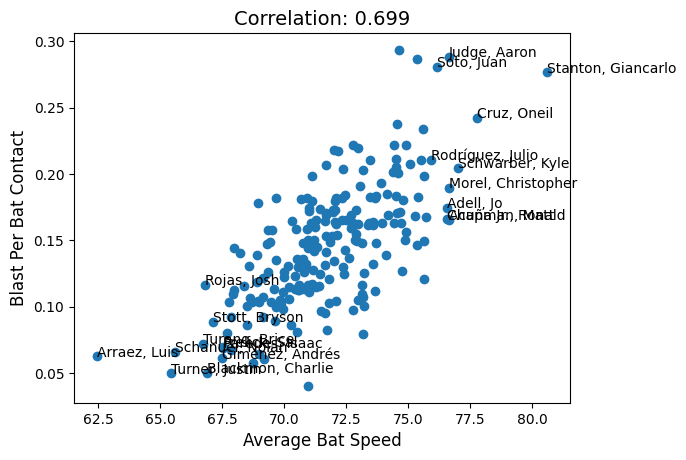

In [212]:
plt.scatter(bat_tracking['avg_bat_speed'], bat_tracking['blast_per_bat_contact'])

plt.xlabel('Average Bat Speed', fontsize=12)
plt.ylabel('Blast Per Bat Contact', fontsize=12)

plt.title(f'Correlation: {correlation:.3f}', fontsize=14)

top_10_names = bat_tracking.sort_values(by='avg_bat_speed', ascending=False)['name'].head(10).tolist()
bottom_10_names = bat_tracking.sort_values(by='avg_bat_speed')['name'].head(10).tolist()

for name in top_10_names + bottom_10_names:
    x, y = bat_tracking[bat_tracking['name'] == name]['avg_bat_speed'], bat_tracking[bat_tracking['name'] == name]['blast_per_bat_contact']
    plt.text(x, y, name, fontsize=10)

plt.show()


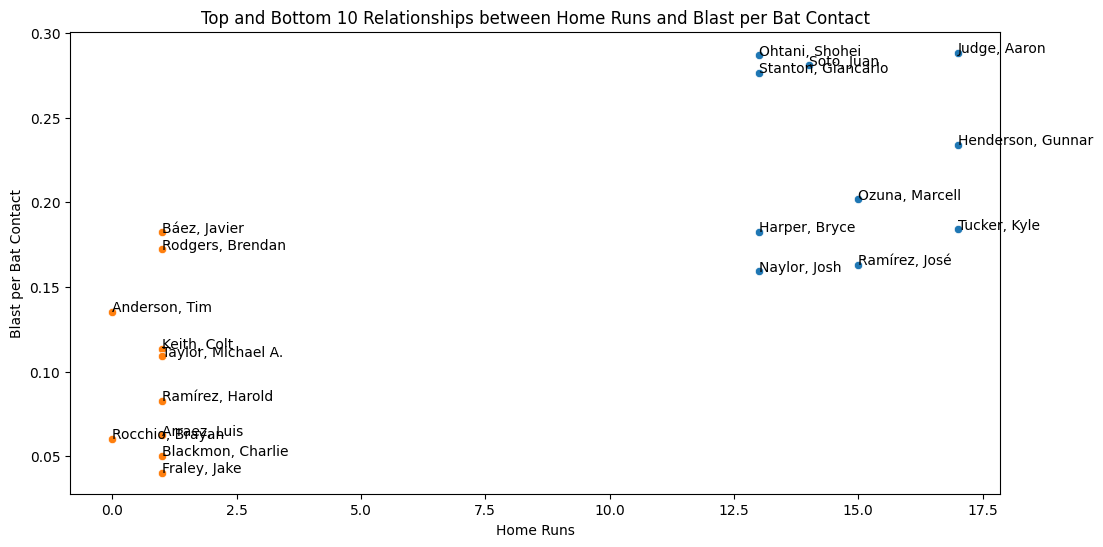

In [227]:
top_10 = combined_data.sort_values(by='HR', ascending=False).head(10)
bottom_10 = combined_data.sort_values(by='HR', ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='HR', y='blast_per_bat_contact', data=top_10)
sns.scatterplot(x='HR', y='blast_per_bat_contact', data=bottom_10)

for i, row in top_10.iterrows():
    plt.annotate(row['name'], (row['HR'], row['blast_per_bat_contact']))

for i, row in bottom_10.iterrows():
    plt.annotate(row['name'], (row['HR'], row['blast_per_bat_contact']))

plt.xlabel('Home Runs')
plt.ylabel('Blast per Bat Contact')
plt.title('Top and Bottom 10 Relationships between Home Runs and Blast per Bat Contact')
plt.show()


In [230]:
grouped_data = combined_data.groupby('Team')
grouped_data

In [215]:
combined_data_sum = grouped_data.sum()
combined_data_sum = combined_data_sum.reset_index()
combined_data_sum

,Team,mlbID,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,...,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
0,Maj-ALBaltimore,4653689,"Henderson, GunnarMountcastle, RyanCowser, Colt...",2008,6.333524,1575,509.210876,2.149515,2.294035,1.791291,...,16,1,11,15,28,6,1.767,2.220,3.256,5.475
1,Maj-ALBoston,3982767,"O'Neill, TylerAbreu, WilyerDevers, RafaelWong,...",1574,5.434788,1185,436.758829,1.744875,1.843936,1.388006,...,11,2,7,17,26,6,1.589,1.998,2.820,4.818
2,Maj-ALChicago,3292656,"Jiménez, EloySheets, GavinDeJong, PaulVaughn, ...",1296,4.530130,1004,357.895831,1.054782,1.770649,1.384497,...,11,0,5,23,9,1,1.092,1.415,1.792,3.204
3,Maj-ALCleveland,4623309,"Naylor, JoshFreeman, TylerRamírez, JoséNaylor,...",1825,6.312261,1465,491.682591,0.864322,2.413286,1.936392,...,26,3,13,24,33,15,1.596,2.120,2.699,4.818
4,Maj-ALDetroit,5259657,"Báez, JavierGreene, RileyTorkelson, SpencerCar...",1901,7.262541,1482,575.894815,1.840906,2.846125,2.227879,...,16,0,11,24,15,4,1.926,2.464,3.165,5.631
5,Maj-ALHouston,3795807,"Alvarez, YordanPeña, JeremyDiaz, YainerTucker,...",1698,5.436645,1405,432.405854,1.436290,2.112082,1.750046,...,11,0,8,32,26,4,1.627,2.029,2.687,4.716
6,Maj-ALKansas City,4496734,"Witt Jr., BobbyRenfroe, HunterVelázquez, Nelso...",1935,6.351353,1503,511.711468,2.335859,2.412296,1.876452,...,13,2,13,22,33,6,1.698,2.159,2.924,5.085
7,Maj-ALLos Angeles,5213047,"Adell, JoTrout, MikeMoniak, MickeyNeto, ZachO'...",1855,7.210927,1450,571.930683,2.089091,2.593360,2.041359,...,11,4,8,19,36,19,1.987,2.482,3.484,5.965
8,Maj-ALMinnesota,3727737,"Jeffers, RyanKirilloff, AlexKepler, MaxJulien,...",1394,5.415413,1055,429.976247,1.252301,2.000377,1.509184,...,20,0,7,15,15,4,1.439,1.910,2.655,4.563
9,Maj-ALNew York,4953030,"Stanton, GiancarloJudge, AaronSoto, JuanTorres...",2296,7.235851,1803,576.142699,2.583474,2.854652,2.264152,...,15,3,16,41,23,7,2.096,2.692,3.637,6.329


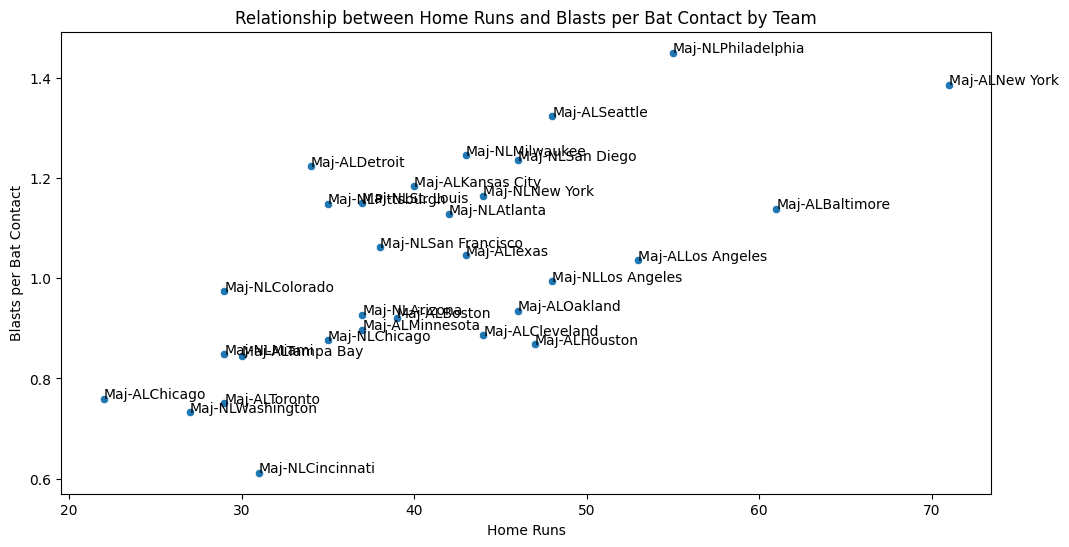

In [231]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='HR', y='blast_per_bat_contact', data=combined_data_sum)

for i, row in combined_data_sum.iterrows():
    plt.annotate(row['Team'], (row['HR'], row['blast_per_bat_contact']))

plt.xlabel('Home Runs')
plt.ylabel('Blasts per Bat Contact')
plt.title('Relationship between Home Runs and Blasts per Bat Contact by Team')
plt.show()
